# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Support Vector Machines (SVM) - Understanding Hyperparameters</b></p>

# Support Vector Machine (SVM)
SVM is one of the most important and powerful Supervised Machine Learning techniques and is widely used.

- **Purpose**: SVM is a supervised learning model primarily used for classification (and also regression) problems.
- **Goal**: The main goal of SVM is to find a separating **hyperplane** that provides the largest margin between two classes.
- **Hyperplane**: In 2D, this is a line that best separates the two classes. In higher dimensions, it becomes a hyperplane.

## Conclusion
- SVM is a powerful and flexible classification algorithm.
- Performs well on small to medium-sized datasets and is resistant to overfitting.
- Kernel functions enable it to successfully classify non-linear data.
- Widely used in multi-class classification problems using OvA (One-vs-All) and OvO (One-vs-One) approaches.

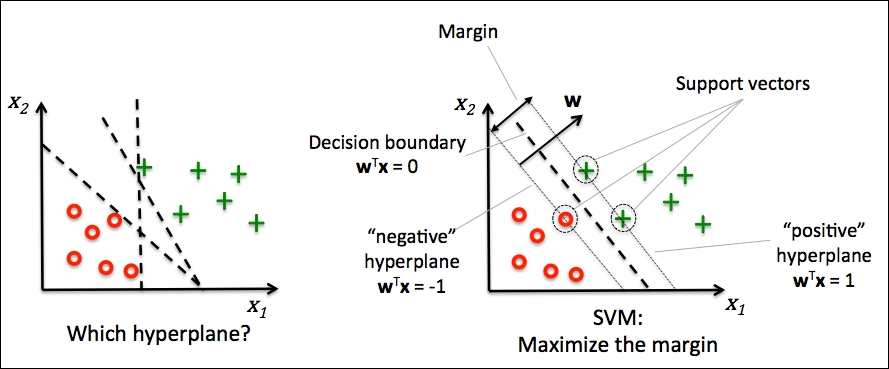

# <font color='green'> <b>Support Vector Machines (SVM) - Explaining Hyper Parameters</b><font color='black'>

**Dataset Explanation**

This dataset contains data from a study involving mice and their exposure to two different medications. The goal of the study is to observe the presence of a virus in relation to the amounts of two medications administered to the mice. The dataset consists of three columns:

1. **Med_1_mL**: The amount of Medication 1 administered to each mouse, measured in milliliters (mL).
2. **Med_2_mL**: The amount of Medication 2 administered to each mouse, measured in milliliters (mL).
3. **Virus Present**: A binary indicator representing the presence of the virus in the mouse, where 0 indicates absence and 1 indicates presence.

The dataset can be used to analyze the relationship between the amounts of the two medications and the presence of the virus, potentially leading to insights about the effectiveness of the medications in preventing or treating the viral infection.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## <font color='green'> <b>Manually Defining the Separating Hyperplane in SVM</b><font color='black'>

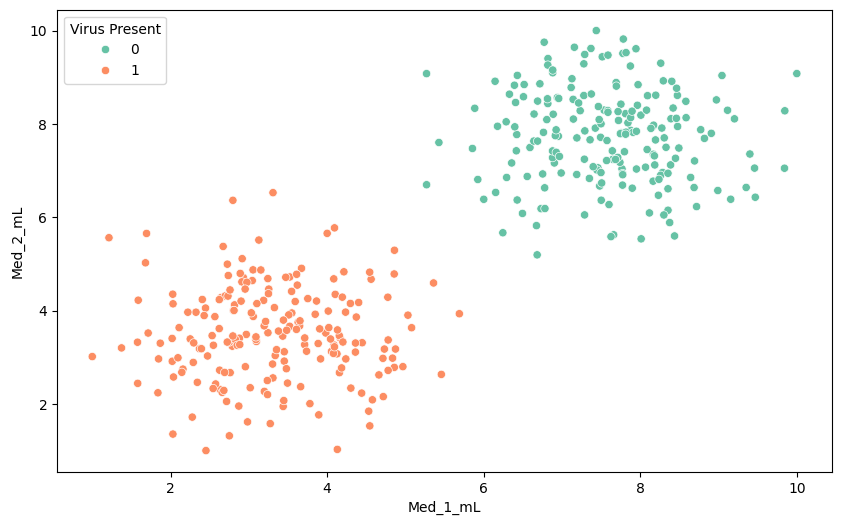

In [5]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", hue = "Virus Present",data = df, palette = "Set2");

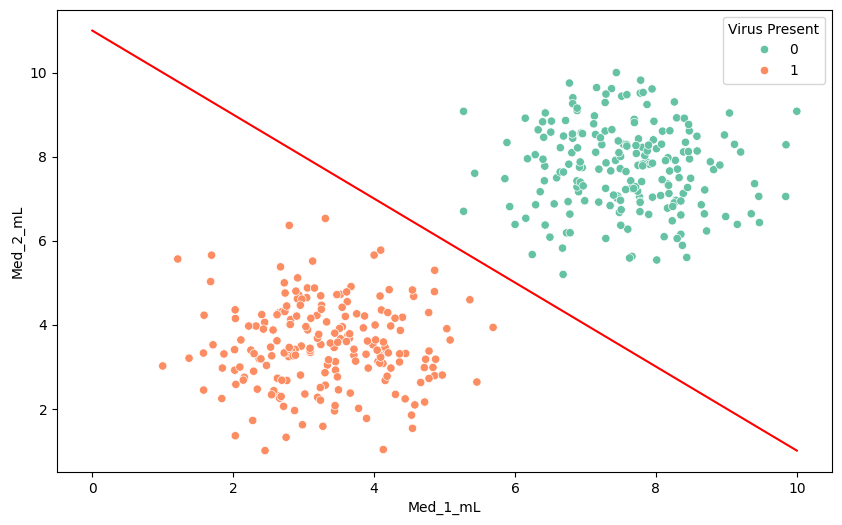

In [6]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", hue = "Virus Present",data = df, palette = "Set2")

x = np.linspace(0, 10,100)

m = -1
b = 11
y = m*x + b

plt.plot(x, y, "red");

## <font color='green'> <b>Modelling</b><font color='black'>

In [7]:
from sklearn.svm  import SVC

In [10]:
X = df.drop("Virus Present", axis= 1)
y = df["Virus Present"]

In [28]:
model= SVC(kernel="linear", C =1)

In [29]:
model.fit(X, y)

SVC(C=1, kernel='linear')

In [30]:
from svm_margin_plot import plot_svm_boundary

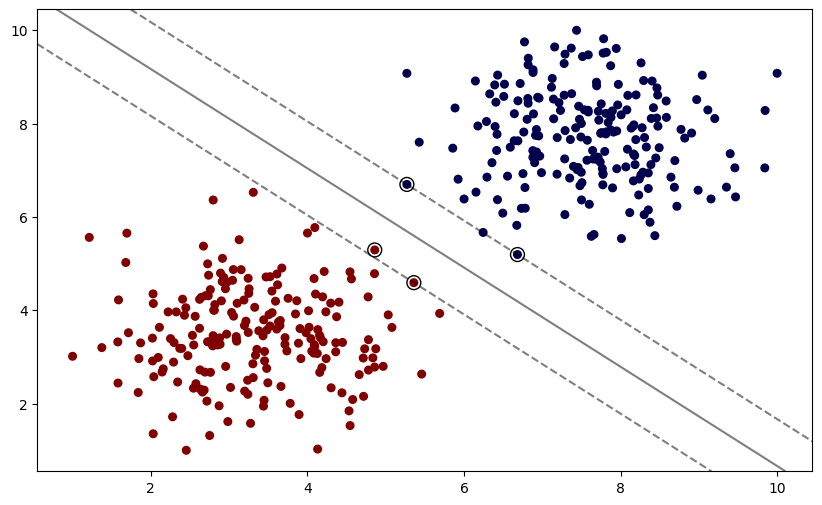

In [31]:
plot_svm_boundary(model, X, y)

## <font color='green'> <b>SVM HyperParameters</b><font color='black'>

In [21]:
model= SVC(kernel="linear", C=0.1)

In [22]:
model.fit(X, y)

SVC(C=0.1, kernel='linear')

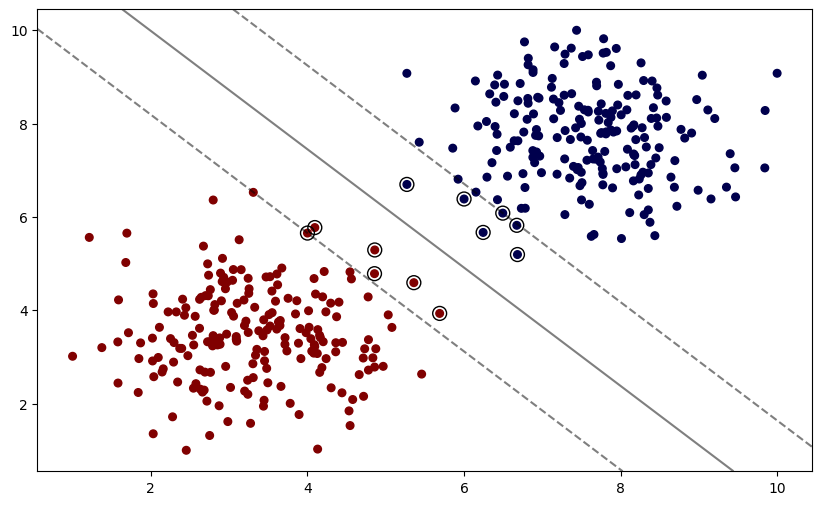

In [24]:
plot_svm_boundary(model, X, y)

In [25]:
model= SVC(kernel="linear", C=10)

In [26]:
model.fit(X, y)

SVC(C=10, kernel='linear')

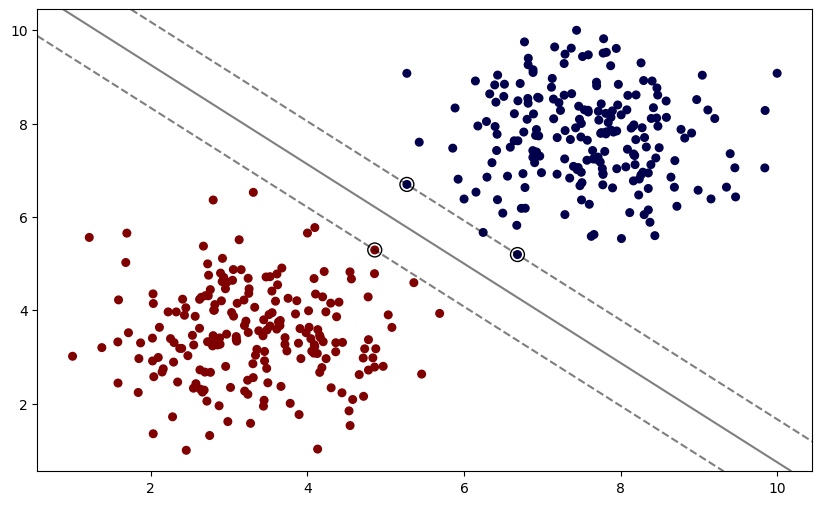

In [27]:
plot_svm_boundary(model, X, y)

## <font color='blue'> <b>kernel</b><font color='black'>

- Kernel functions enhance the flexibility and generalization capability of SVMs, enabling them to adapt to different datasets.
- The choice of kernel should be carefully made depending on the nature of the data and the problem.
- Selecting the correct kernel and hyperparameters significantly affects the model's performance and generalization ability.

In [33]:
model = SVC(kernel = "rbf", C=1, gamma=0.1)
model.fit( X, y)

SVC(C=1, gamma=0.1)

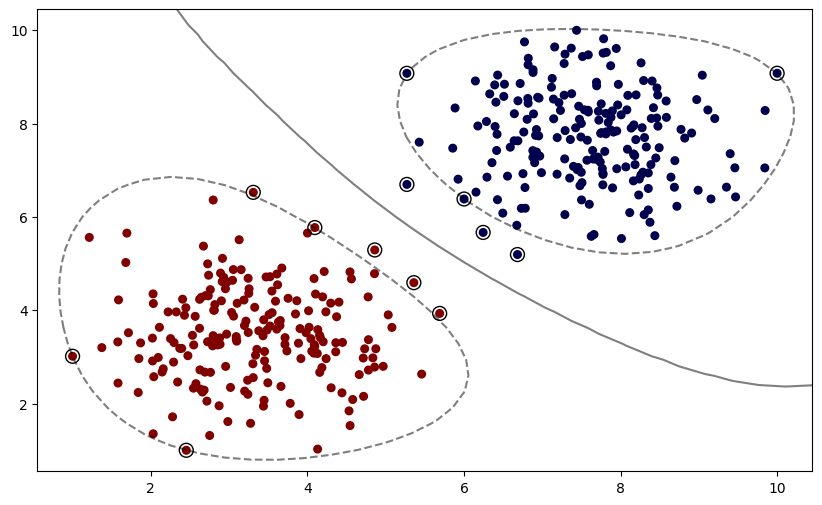

In [34]:
plot_svm_boundary(model, X, y)

In [35]:
model = SVC(kernel = "rbf", C=1, gamma=1)
model.fit( X, y)

SVC(C=1, gamma=1)

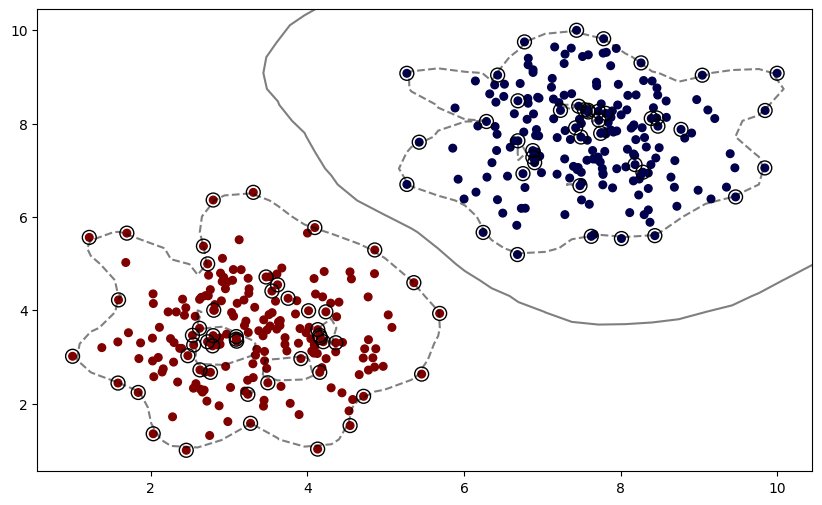

In [36]:
plot_svm_boundary(model, X, y)

## <font color='blue'> <b>gamma</b><font color='black'>

 The two main hyperparameters in SVM, Gamma and C, significantly affect the model's performance.
Proper tuning of these parameters can enhance the model's generalization ability and accuracy.

**C and Gamma**: Two critical parameters that determine the performance of an SVM model.
**Regularization**: Low C and Gamma values indicate high regularization and a simpler model; high C and Gamma values indicate low regularization and a more complex model.
**Interaction**: As the Gamma value increases, the effect of C decreases. Understanding this interaction helps in correctly tuning the model.
**Grid Search**: Used to find the best combination of parameters.


In [37]:
model = SVC(kernel = "rbf", C=1, gamma=0.05)
model.fit( X, y)

SVC(C=1, gamma=0.05)

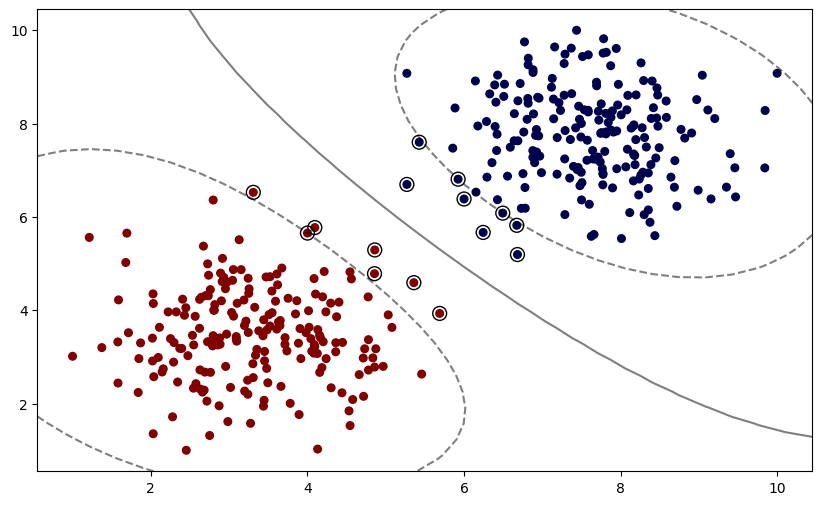

In [38]:
plot_svm_boundary(model, X, y)

## <font color='blue'> <b>degree</b><font color='black'>

**Degree (Only for Polynomial Kernels)**
In SVM, the **Degree** parameter is meaningful only when using the **polynomial** kernel function.
It is ignored by all other kernel types.
This parameter defines the degree of the polynomial and directly affects the complexity of the decision boundary.

- **Degree**: The degree of the polynomial kernel function, meaningful only when using a polynomial kernel.
- **Low Degree**: Simpler and more generalizable model, less computation.
- **High Degree**: More complex and biased model, risk of overfitting, higher computation.
- **Grid Search**: Used to find the best combination of Degree and other parameters.

Correct tuning of the Degree parameter can make a significant performance difference in SVM models using a polynomial kernel.
This parameter directly affects the complexity of the decision boundary and the generalization ability of the model.


In [41]:
model = SVC(kernel = "poly", C=0.01, degree=1)
model.fit( X, y)

SVC(C=0.01, degree=1, kernel='poly')

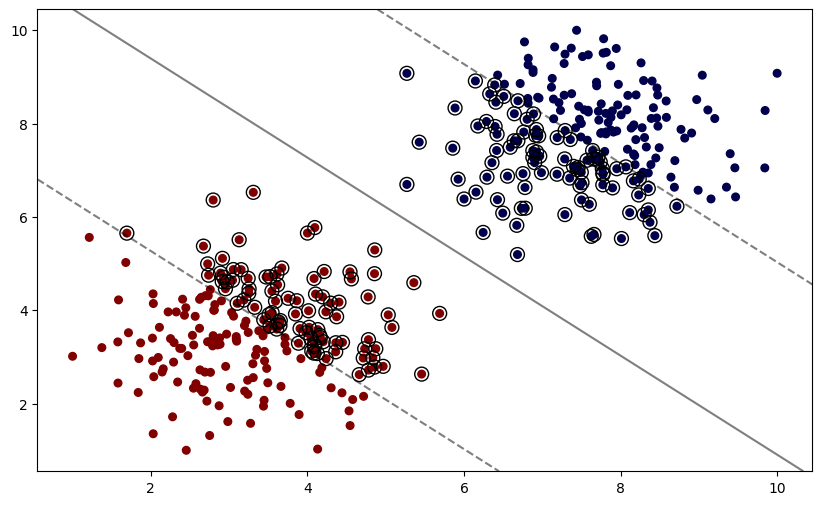

In [42]:
plot_svm_boundary(model, X, y)

In [ ]:
model = SVC(kernel = "poly", C=0.01, degree=3)
model.fit( X, y)

SVC(C=0.01, kernel='poly')

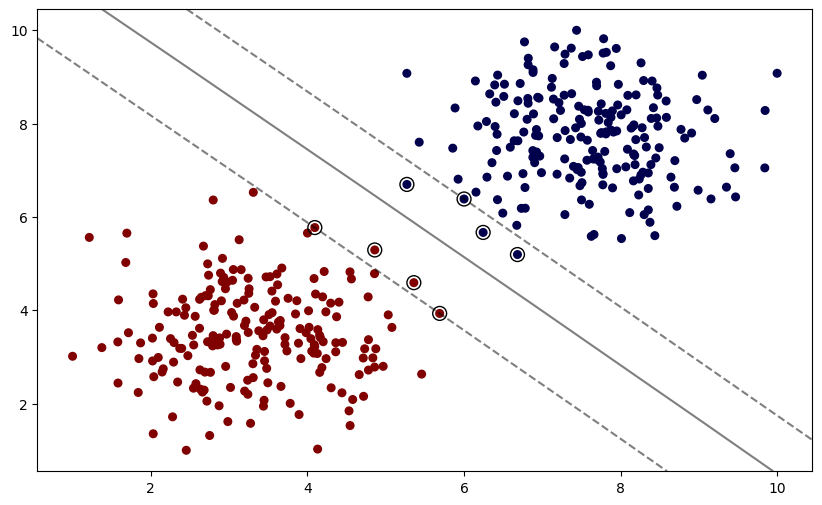

In [44]:
plot_svm_boundary(model, X, y)

# <font color='green'> <b>GridSearch</b><font color='black'>

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
svm = SVC()
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 10, 1000],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma': ["scale", "auto", 0.1, 1],
    'degree': [1, 2, 3]
}
grid = GridSearchCV(svm, param_grid, n_jobs=-1)

In [47]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 1000],
                         'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [48]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}